<a href="https://colab.research.google.com/github/Archi1809/Fraud_Detection/blob/main/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Data Gathering

Importing

In [ ]:
import pandas as pd

# Read the CSV file into a DataFrame
dt = pd.read_csv("creditcard.csv")

# Display the info of the dataset
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180351 entries, 0 to 180350
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    180351 non-null  float64
 1   V1      180351 non-null  float64
 2   V2      180351 non-null  float64
 3   V3      180351 non-null  float64
 4   V4      180351 non-null  float64
 5   V5      180351 non-null  float64
 6   V6      180351 non-null  float64
 7   V7      180351 non-null  float64
 8   V8      180351 non-null  float64
 9   V9      180350 non-null  float64
 10  V10     180350 non-null  float64
 11  V11     180350 non-null  float64
 12  V12     180350 non-null  float64
 13  V13     180350 non-null  float64
 14  V14     180350 non-null  float64
 15  V15     180350 non-null  float64
 16  V16     180350 non-null  float64
 17  V17     180350 non-null  float64
 18  V18     180350 non-null  float64
 19  V19     180350 non-null  float64
 20  V20     180350 non-null  float64
 21  V21     18

In [ ]:
# Display the first 6 rows of the dataset
dt.head(6)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0.0


Descriptive Statistics of the DataFrame

In [ ]:
dt.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,180351.000000,180351.000000,180351.000000,180351.000000,180351.000000,180351.000000,180351.000000,180351.000000,180351.000000,180350.000000,...,180350.000000,180350.000000,180350.000000,180350.000000,180350.000000,180350.000000,180350.000000,180350.000000,180350.000000,180350.000000
mean,64311.566190,-0.145331,0.025240,0.430058,0.099535,-0.154862,0.054170,-0.071213,0.026522,0.015512,...,-0.022623,-0.070349,-0.020086,0.007205,0.080848,0.010398,0.002049,0.002168,88.248748,0.002018
std,30347.247811,1.871304,1.614101,1.411181,1.381971,1.352537,1.302884,1.212845,1.226281,1.145966,...,0.743755,0.676677,0.595308,0.600710,0.474494,0.489683,0.392520,0.307691,246.997674,0.044880
min,0.000000,-56.407510,-72.715728,-33.680984,-5.519697,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,42203.000000,-0.977400,-0.557176,-0.153895,-0.765620,-0.813617,-0.697945,-0.583844,-0.169208,-0.660590,...,-0.229104,-0.543503,-0.169513,-0.335673,-0.213247,-0.330643,-0.065823,-0.033913,5.680000,0.000000
50%,62895.000000,-0.147139,0.096708,0.580202,0.103124,-0.207890,-0.208333,-0.025300,0.051259,-0.077049,...,-0.050295,-0.055240,-0.033385,0.057135,0.124796,-0.059405,0.007672,0.020196,22.220000,0.000000
75%,81175.500000,1.194524,0.793880,1.272423,0.918396,0.406179,0.446929,0.474826,0.345506,0.635238,...,0.136487,0.385012,0.104860,0.418056,0.394112,0.269162,0.089462,0.078156,78.000000,0.000000
max,124501.000000,2.439207,22.057729,9.382558,16.875344,34.801666,22.529298,36.677268,20.007208,15.594995,...,27.202839,10.503090,19.002942,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


In [ ]:
# Calculate the variance and standard deviation of the 'Amount' variable
amount_variance = dt['Amount'].var()
amount_std_dev = dt['Amount'].std()
print("Variance:", amount_variance)
print("Standard Deviation:", amount_std_dev)


Variance: 61007.851055139174
Standard Deviation: 246.9976741897364


# 2. Data Preprocessing

In [ ]:
creditcard_data = dt.copy()

Null Values

In [ ]:
# Assuming 'creditcard_data' is your DataFrame
# Find NaN values in the DataFrame
nan_values = creditcard_data.isna().sum()

# Display columns with NaN values and their counts
columns_with_nan = nan_values[nan_values > 0]
print("Columns with NaN values:")
print(columns_with_nan)

# Replace NaN values with the mean or median
for column in columns_with_nan.index:
    # Choose between mean or median based on your preference
    # Using mean:
    # mean_value = creditcard_data[column].mean()
    # Replace NaN values with the chosen statistic
    # creditcard_data[column].fillna(mean_value, inplace=True)

    # Using median:
    # median_value = creditcard_data[column].median()

    # Calculate the mode
    mode_value = creditcard_data[column].mode().iloc[0]

    # Replace NaN values with the mode
    creditcard_data[column].fillna(mode_value, inplace=True)

# Verify that NaN values are filled
print("\nNaN values after filling:")
print(creditcard_data.isna().sum())

Columns with NaN values:
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

NaN values after filling:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [ ]:
creditcard_data['Class'].describe()

count    180351.000000
mean          0.002018
std           0.044880
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Class, dtype: float64

Plotting Value Counts of 'Class' Column

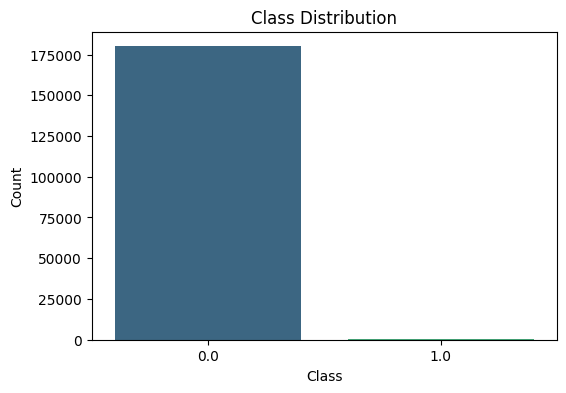

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Class' is the column indicating the class (fraud or not fraud)
class_counts = creditcard_data['Class'].value_counts()

# Plotting the bar plot
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=creditcard_data, palette='viridis')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

Resampling and Plotting Balanced Classes

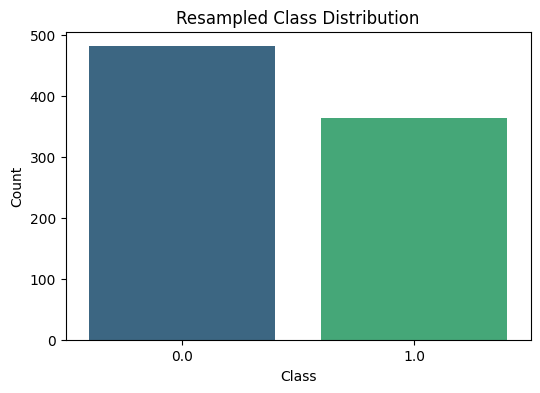

In [ ]:
# Selecting 1000 samples of Class 0 using random sampling
class_0_samples = creditcard_data[creditcard_data["Class"] == 0].sample(n=1000, random_state=42)

# Calculating quartiles and interquartile range (IQR) for Class 0 samples
Q1 = class_0_samples.quantile(0.25)
Q3 = class_0_samples.quantile(0.75)
IQR = Q3 - Q1

# Filtering out outliers from Class 0 samples based on IQR method
class_0_samples = class_0_samples[
    ~((class_0_samples < (Q1 - 1.43 * IQR)) | (class_0_samples > (Q3 + 1.5 * IQR))).any(
        axis=1
    )
]

# Selecting all samples of Class 1
class_1_samples = creditcard_data[creditcard_data["Class"] == 1]

# Concatenating the resampled Class 0 samples and all Class 1 samples
df_resampled = pd.concat([class_0_samples, class_1_samples])

# Plotting the value counts of the "Class" column in the resampled DataFrame
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df_resampled, palette='viridis')
plt.title('Resampled Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

Correlation Matrix

<Axes: >

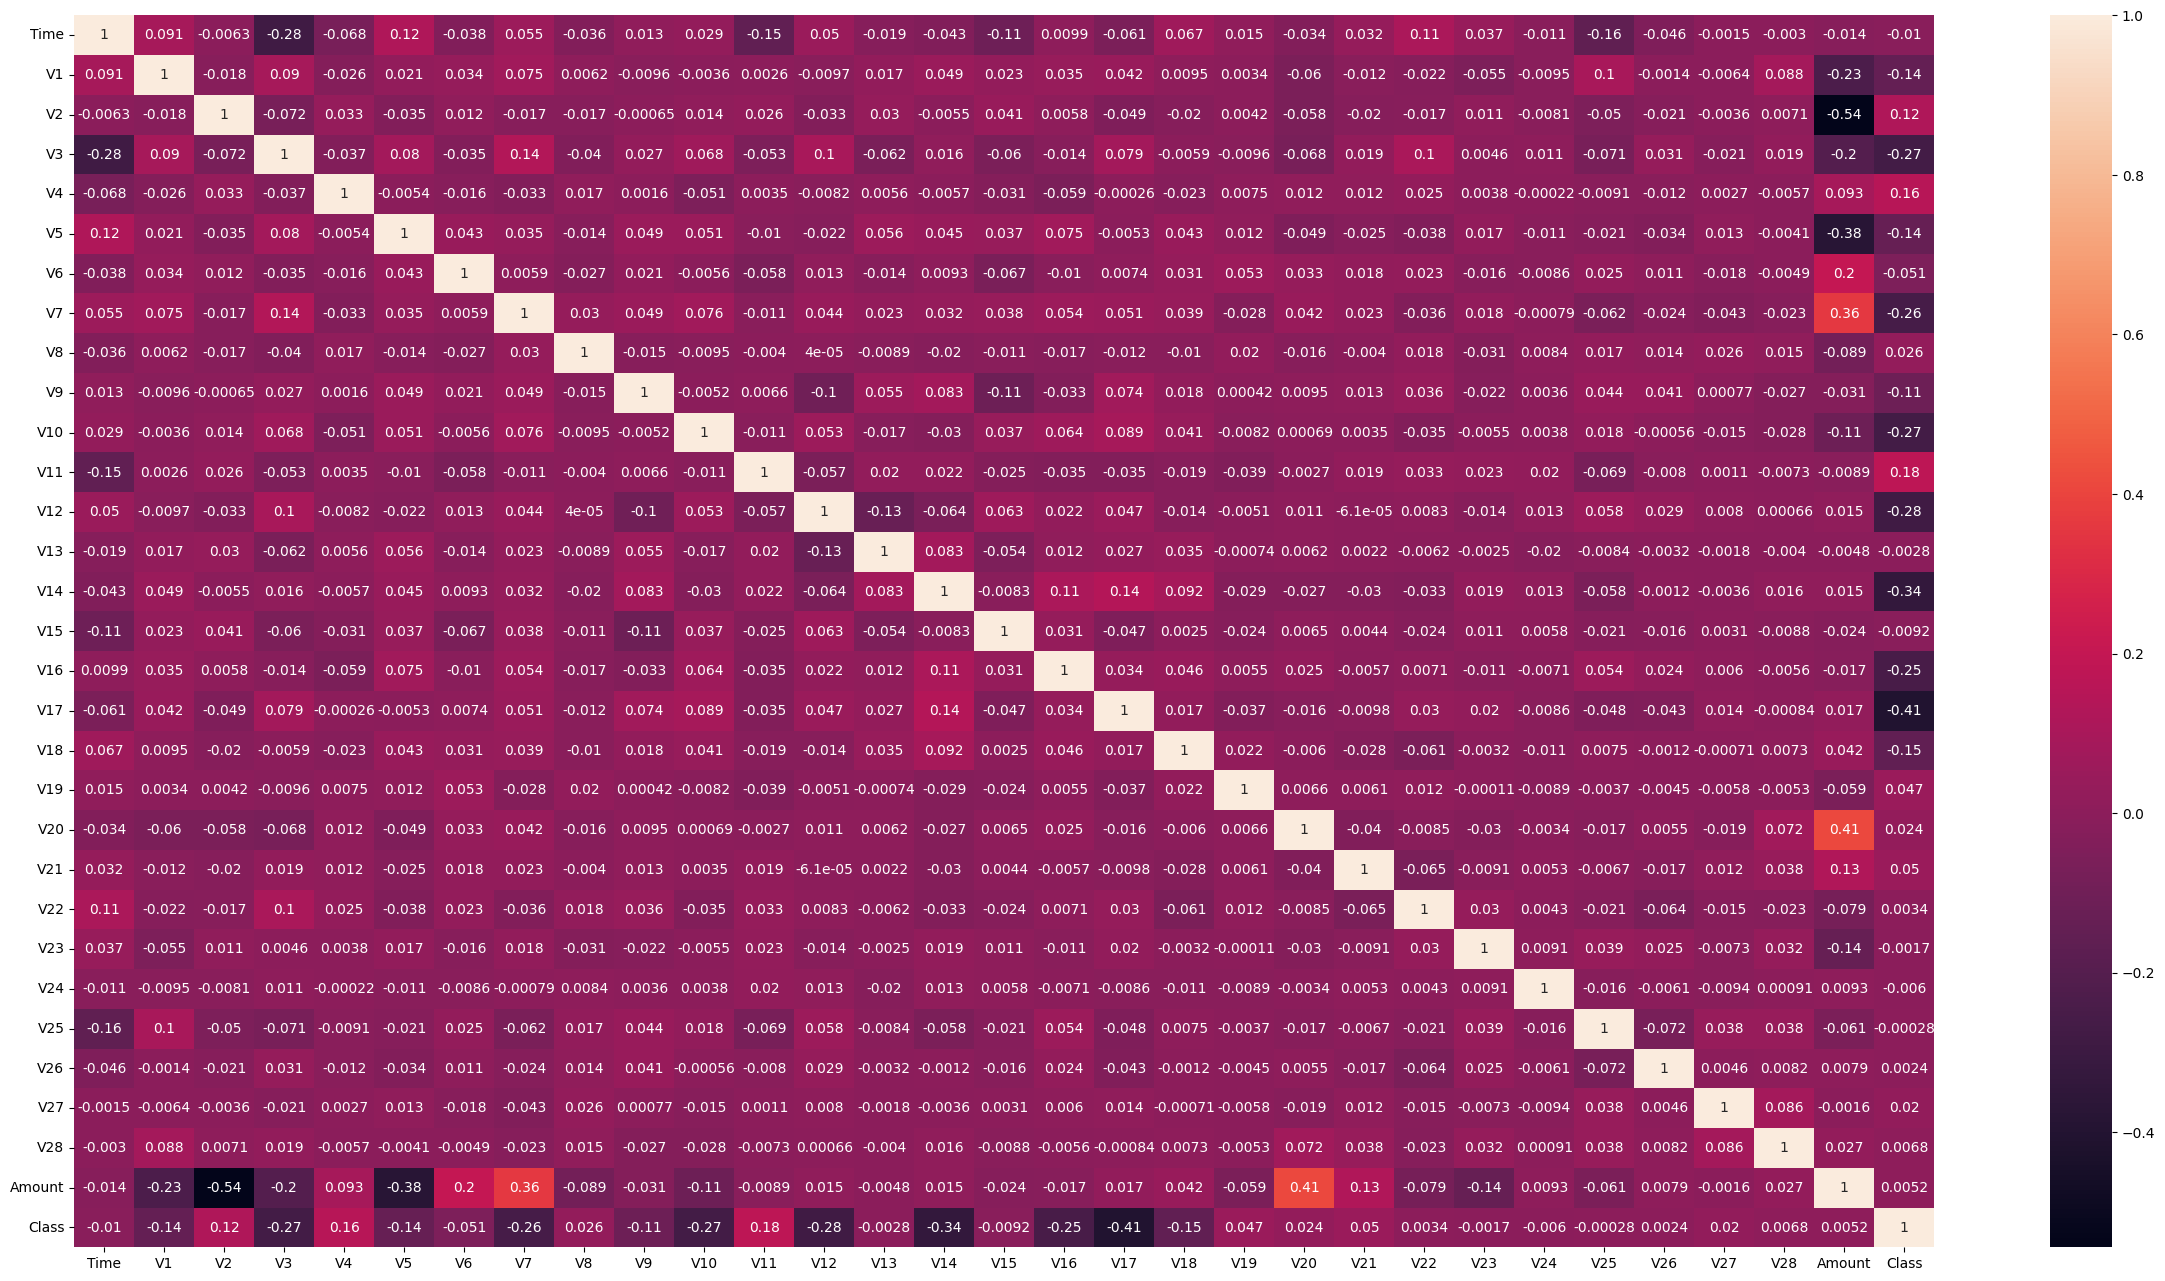

In [ ]:
plt.figure(figsize=(30,16))
sns.heatmap(creditcard_data.corr(),annot=True)

Outliers

<Axes: ylabel='Amount'>

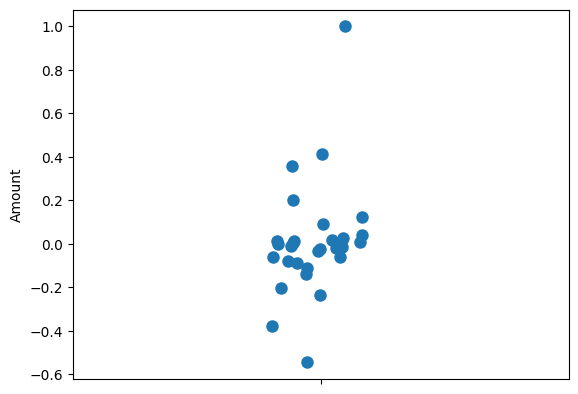

In [ ]:
# scatterplot
sns.stripplot(creditcard_data.corr()['Amount'], size=9)

Feature important

In [ ]:
creditcard_data.corr()['Amount'].sort_values(ascending=False)

Amount    1.000000
V20       0.412271
V7        0.359404
V6        0.201733
V21       0.126039
V4        0.093125
V18       0.042000
V28       0.026588
V17       0.017007
V14       0.015142
V12       0.014852
V24       0.009311
V26       0.007902
Class     0.005188
V27      -0.001596
V13      -0.004786
V11      -0.008875
Time     -0.014171
V16      -0.017099
V15      -0.024378
V9       -0.030614
V19      -0.058906
V25      -0.061126
V22      -0.079040
V8       -0.088898
V10      -0.112046
V23      -0.135944
V3       -0.200905
V1       -0.233665
V5       -0.376361
V2       -0.544131
Name: Amount, dtype: float64

# 3. Feature Selection

Splitting input and output variable

In [ ]:
# Selecting specific columns for feature 'X' and target 'y'
X = creditcard_data.drop(['Class'], axis=1)

y = creditcard_data["Class"]


Standard scaling

In [ ]:
# Standardize the 'Amount' variable
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scaling the 'Amount' column using StandardScaler
X["Amount"] = scaler.fit_transform(X["Amount"].values.reshape(-1, 1))

# Displaying the transformed feature 'X'
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.248472
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.346395
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.175773
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.142722
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180346,124501.0,1.776084,-0.847941,-0.122495,0.327068,-0.901450,0.297088,-1.002304,0.351652,1.498805,...,-0.124613,0.158905,0.350790,0.255732,0.656765,-0.493054,-0.462741,0.029698,-0.019629,-0.035216
180347,124501.0,2.112579,-0.978592,-2.531591,-1.672016,1.621659,3.410626,-1.522773,0.940170,-0.095966,...,0.123173,0.241275,0.658909,0.137661,0.604387,-0.114413,-0.067851,0.047220,-0.016706,-0.256110
180348,124501.0,1.964991,-0.268471,-1.385679,0.273598,-0.092173,-1.228189,0.269715,-0.398833,0.388609,...,-0.078249,0.249128,0.721101,-0.008697,-0.000683,0.033707,0.787556,-0.097355,-0.060784,-0.094326
180349,124501.0,-1.538327,1.432749,-0.122378,-2.499628,-0.198887,-1.405793,0.459504,0.794566,-0.200864,...,-0.245888,-0.179255,-0.728338,0.009726,0.055995,-0.063253,0.358524,0.075288,0.086458,-0.341091


# 4. Splitting train and test data

Train-Test Split of Scaled Features and Target Variable

In [ ]:
# Importing the train_test_split function from scikit-learn
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)


# 5. Evalution Function for Models

Evaluation Function for Classification Models

In [ ]:
# Importing necessary metrics from scikit-learn
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    accuracy_score,
)


# Defining a function to evaluate the model and display metrics
def evaluate(model, conf_matrix=True, return_=False):
    # Confusion Matrix
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    tp = cm[0, 0]
    tn = cm[1, 1]
    fp = cm[0, 1]
    fn = cm[1, 0]

  # Displaying the Confusion Matrix if specified
    if conf_matrix:
        plt.figure(figsize=(8, 6))
        sns.heatmap(
            cm,
            annot=True,
            fmt="d",
            cmap="Blues",
            cbar=False,
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"],
        )
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix")
        plt.show()

    # Displaying the Classification Report
    print(classification_report(y_test, y_pred))

    # Calculating and displaying additional metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    # Displaying the summary metrics
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1-Score: {f1:.3f}")
    print(f"ROC-AUC: {roc_auc:.3f}")

    # Extracting the model name for display
    model_name = str(type(model).__name__)

    # Returning metrics as a dictionary if specified
    if return_:
        metrics_dict = {
            "Model": model_name,
            "accuracy": round(accuracy, 3),
            "precision": round(precision, 3),
            "recall": round(recall, 3),
            "f1": round(f1, 3),
            "roc_auc": round(roc_auc, 3),
            "tp": tp,
            "tn": tn,
            "fp": fp,
            "fn": fn,
        }
        return metrics_dict

# 6. Models

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


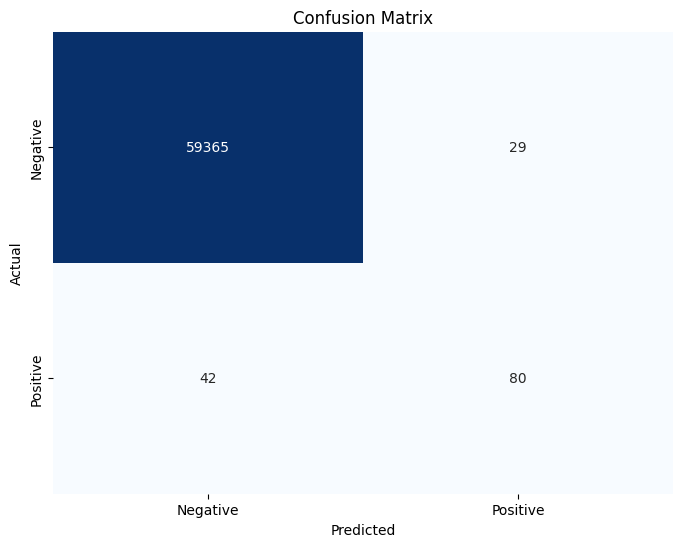

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     59394
           1       0.73      0.66      0.69       122

    accuracy                           1.00     59516
   macro avg       0.87      0.83      0.85     59516
weighted avg       1.00      1.00      1.00     59516

Accuracy: 0.999
Precision: 0.734
Recall: 0.656
F1-Score: 0.693
ROC-AUC: 0.828


In [ ]:
# Importing LogisticRegression from scikit-learn
from sklearn.linear_model import LogisticRegression

# Creating an instance of LogisticRegression
Logistic_Regression = LogisticRegression(random_state=42)

# Fitting the model to the training data
Logistic_Regression.fit(X_train, y_train)

# Evaluating and displaying the performance of the Logistic Regression model
evaluate(Logistic_Regression)


In [ ]:
# Check the data type and unique values of y_train
print("Data type of y_train:", y_train.dtypes)
print("Unique values in y_train:", y_train.unique())

# # Check data types and unique values for each feature in X_train
# for column in X_train.columns:
#     print(f"Data type of {column}: {X_train[column].dtypes}")
#     print(f"Unique values in {column}: {X_train[column].unique()}")
#     print("\n")


Data type of y_train: int64
Unique values in y_train: [0 1]


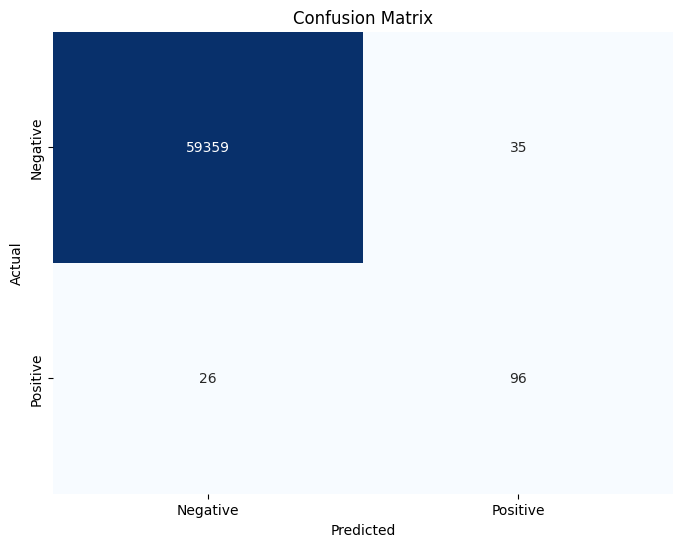

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     59394
           1       0.73      0.79      0.76       122

    accuracy                           1.00     59516
   macro avg       0.87      0.89      0.88     59516
weighted avg       1.00      1.00      1.00     59516

Accuracy: 0.999
Precision: 0.733
Recall: 0.787
F1-Score: 0.759
ROC-AUC: 0.893


In [ ]:
# Importing DecisionTreeClassifier from scikit-learn
from sklearn.tree import DecisionTreeClassifier

# Creating an instance of DecisionTreeClassifier
Decision_Tree = DecisionTreeClassifier(random_state=42)

# Training the Decision Tree model on the training data
Decision_Tree.fit(X_train, y_train)

# Evaluating and displaying the performance of the Decision Tree model
evaluate(Decision_Tree)

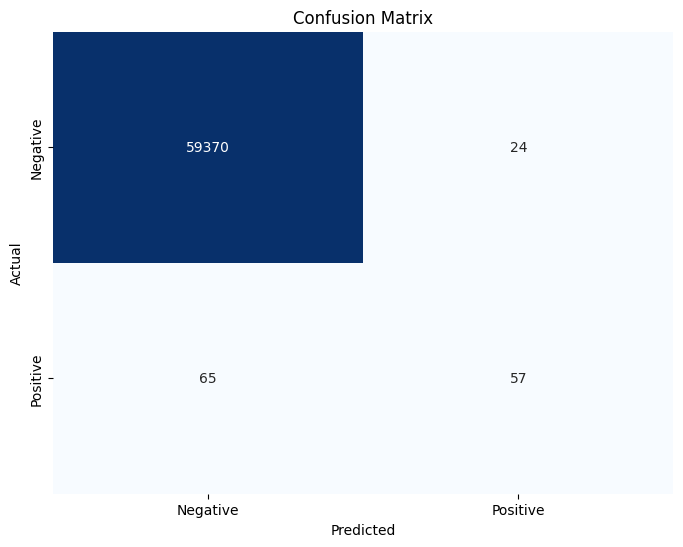

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     59394
           1       0.70      0.47      0.56       122

    accuracy                           1.00     59516
   macro avg       0.85      0.73      0.78     59516
weighted avg       1.00      1.00      1.00     59516

Accuracy: 0.999
Precision: 0.704
Recall: 0.467
F1-Score: 0.562
ROC-AUC: 0.733


In [ ]:
# Importing Support Vector Classification (SVC) from scikit-learn
from sklearn.svm import SVC

# Creating an instance of SVC with a linear kernel
svc = SVC(kernel="linear", random_state=42, probability=True)

# Training the SVC model on the training data
svc.fit(X_train, y_train)

# Evaluating and displaying the performance of the SVC model
evaluate(svc)

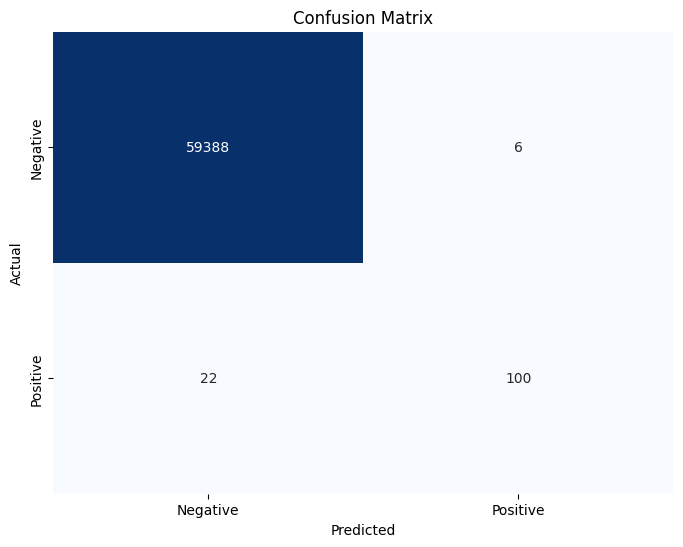

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     59394
           1       0.94      0.82      0.88       122

    accuracy                           1.00     59516
   macro avg       0.97      0.91      0.94     59516
weighted avg       1.00      1.00      1.00     59516

Accuracy: 1.000
Precision: 0.943
Recall: 0.820
F1-Score: 0.877
ROC-AUC: 0.910


In [ ]:
# Importing RandomForestClassifier from scikit-learn
from sklearn.ensemble import RandomForestClassifier

# Creating an instance of RandomForestClassifier
Random_Forest = RandomForestClassifier(
    n_estimators=90, random_state=42, criterion="entropy"
)

# Training the Random Forest classifier on the training data
Random_Forest.fit(X_train, y_train)

# Evaluating and displaying the performance of the Random Forest classifier
evaluate(Random_Forest)

# 7. Comparison of Models

Comparison of Classification Models


In [ ]:
# List of classifiers
classifiers = [
    Logistic_Regression,
    Decision_Tree,
    svc,
    Random_Forest,
]

# Initialize an empty list to store DataFrames
dfs = []

# Loop through classifiers
for classifier in classifiers:
    # Calculate metrics for the current classifier
    metrics_result = evaluate(classifier, return_=True, conf_matrix=False)

    # Create a DataFrame from the dictionary
    metrics_df = pd.DataFrame([metrics_result])

    # Append the DataFrame to the list
    dfs.append(metrics_df)

# Concatenate DataFrames into a single DataFrame
results_df = pd.concat(dfs, ignore_index=True)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     59394
           1       0.73      0.66      0.69       122

    accuracy                           1.00     59516
   macro avg       0.87      0.83      0.85     59516
weighted avg       1.00      1.00      1.00     59516

Accuracy: 0.999
Precision: 0.734
Recall: 0.656
F1-Score: 0.693
ROC-AUC: 0.828
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     59394
           1       0.73      0.79      0.76       122

    accuracy                           1.00     59516
   macro avg       0.87      0.89      0.88     59516
weighted avg       1.00      1.00      1.00     59516

Accuracy: 0.999
Precision: 0.733
Recall: 0.787
F1-Score: 0.759
ROC-AUC: 0.893
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     59394
           1       0.70      0.47      0.56       122

    accuracy              

In [ ]:
results_df

,Model,accuracy,precision,recall,f1,roc_auc,tp,tn,fp,fn
0,LogisticRegression,0.999,0.734,0.656,0.693,0.828,59365,80,29,42
1,DecisionTreeClassifier,0.999,0.733,0.787,0.759,0.893,59359,96,35,26
2,SVC,0.999,0.704,0.467,0.562,0.733,59370,57,24,65
3,RandomForestClassifier,1.000,0.943,0.820,0.877,0.910,59388,100,6,22


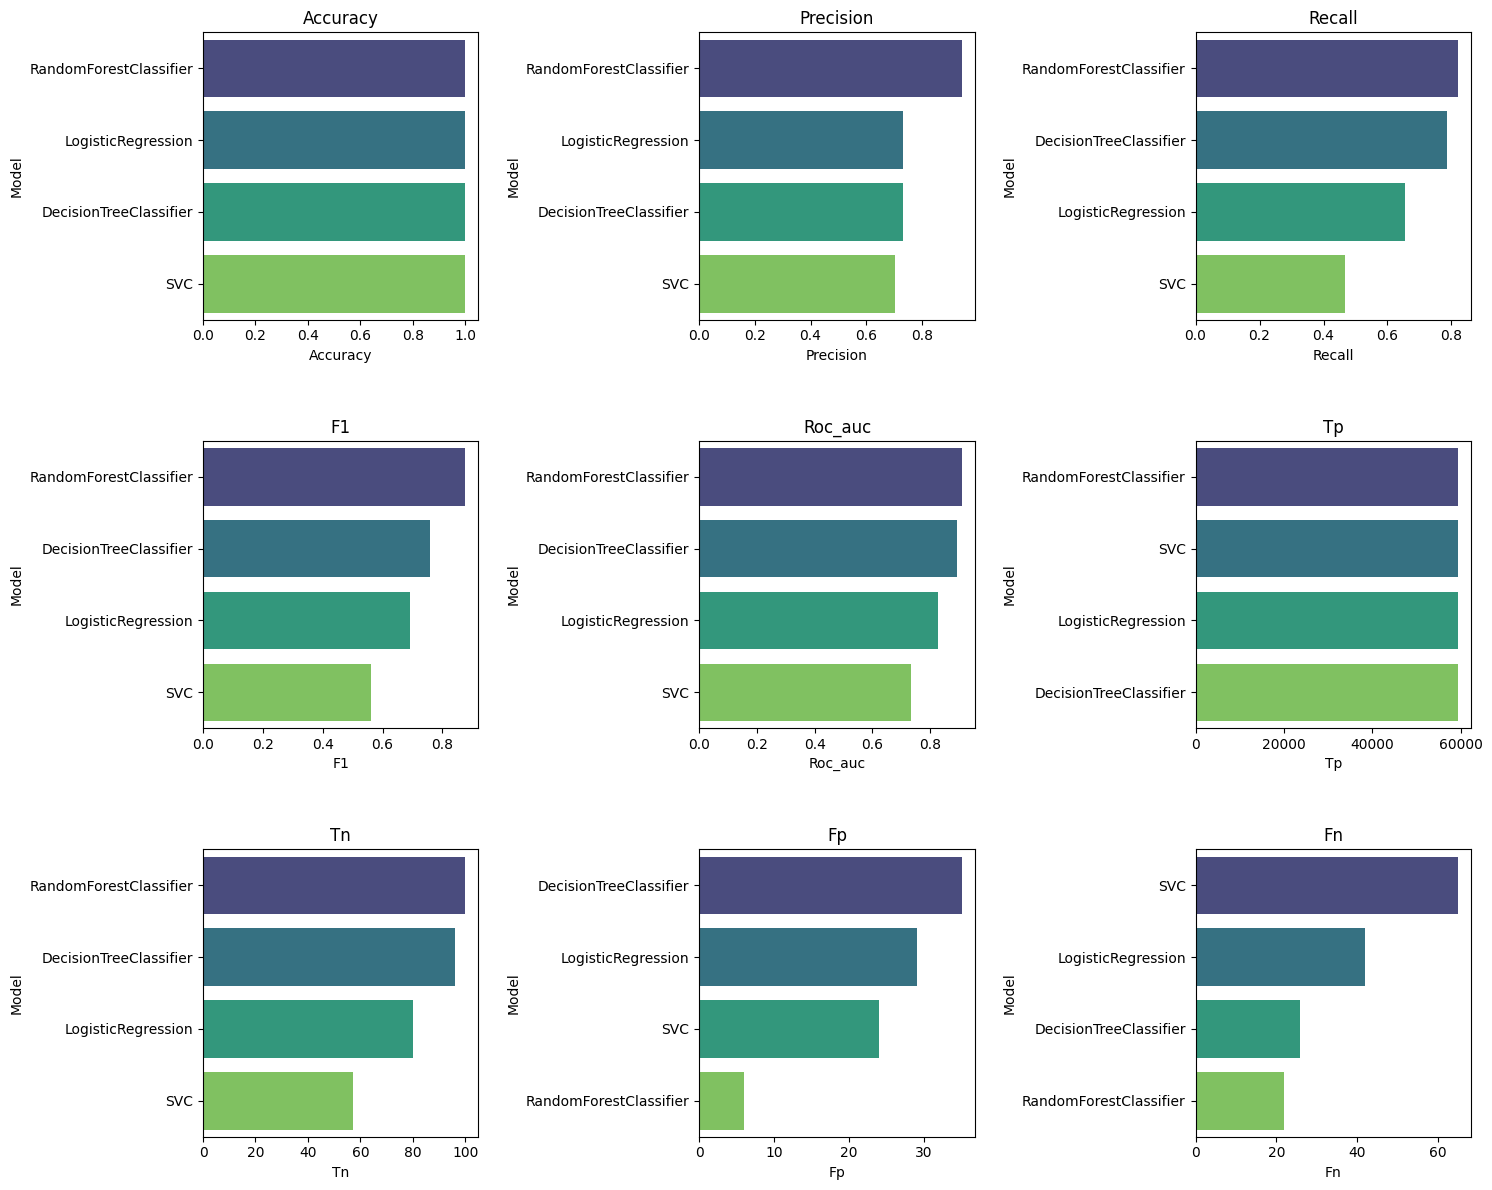

In [ ]:
# Define the metrics to plot
metrics_to_plot = [
    "accuracy",
    "precision",
    "recall",
    "f1",
    "roc_auc",
    "tp",
    "tn",
    "fp",
    "fn",
]

# Plotting
plt.figure(figsize=(15, 12))

# Loop through each metric and create a subplot
for i, metric in enumerate(metrics_to_plot, 1):
    # Sort the DataFrame for the current metric
    sorted_df = results_df.sort_values(by=metric, ascending=False)

    plt.subplot(3, 3, i)
    sns.barplot(x=metric, y="Model", data=sorted_df, palette="viridis")
    plt.title(metric.capitalize())
    plt.xlabel(metric.capitalize())
    plt.ylabel("Model")


# Adjust the layout for better visualization
plt.tight_layout(w_pad=2, h_pad=4)
plt.show()

# 8. Ensembling

In [ ]:
from sklearn.ensemble import VotingClassifier

# Create a VotingClassifier
ensemble_model = VotingClassifier(
    estimators=[('logreg', Logistic_Regression), ('svc', svc), ('dt', Decision_Tree), ('rf', Random_Forest)],
    voting='soft'  # 'soft' enables probability voting for better results
)

# Fit the ensemble model on the training data
ensemble_model.fit(X_train, y_train)

# Make predictions on the test set
ensemble_predictions = ensemble_model.predict(X_test)

# Evaluate the ensemble model
accuracy = accuracy_score(y_test, ensemble_predictions)
print(f'Ensemble Model Accuracy: {accuracy}')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Ensemble Model Accuracy: 0.9993279118220311
